## Insertion Sort

In [1]:
# Straightforward implementation of Insertion-Sort Algorithm as read on CLS
# It accepts *args as input for better test-case implementation, to be easily compared to others Sorting algorithms

def insertion_sort(A: list, *args):
    for j in range(1, len(A)):
        key = A[j]
        i = j-1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i -= 1
        A[i+1] = key
    return A

In [2]:
test_IS: list = [2,1,4,5,3]
sorted_IS = insertion_sort(test_IS[:])
print(f'Insertion Sort sample result: {test_IS} --> {sorted_IS}')

Insertion Sort sample result: [2, 1, 4, 5, 3] --> [1, 2, 3, 4, 5]


## Merge Sort

In [3]:
# Straightforward implementarion of Merge-Sort Algorithm as read on CLS
# Nested Merge function to make it only callable inside Merge-Sort func
# It accepts *args as input for better test-case implementation, to be easily compared to others Sorting algorithms
import math
import sys

def wrapper_MS(A: list, *args):
    
    def merge_sort(A: list, start: int, end: int, *args):
        
        def merge(A: list, start: int, mid: int, end:int):
            left = A[start:mid]
            right = A[mid:end]

            left.append(sys.maxsize)
            right.append(sys.maxsize)
            i = j = 0

            for k in range(start, end):
                if left[i] <= right[j]:
                    A[k] = left[i]
                    i += 1
                else:
                    A[k] = right[j]
                    j += 1

        if start < end -1:
            mid = math.floor((start+end)/2)
            merge_sort(A, start, mid)
            merge_sort(A, mid, end)
            merge(A, start, mid, end)
    
    merge_sort(A, 0, len(A))    
    return A

In [4]:
test_MS: list = [2,1,4,5,3]
sorted_MS = wrapper_MS(test_MS[:])
print(f'Merge Sort sample result: {test_MS} --> {sorted_MS}')

Merge Sort sample result: [2, 1, 4, 5, 3] --> [1, 2, 3, 4, 5]


### Building Datas

In [5]:
def assert_sorted(array: list) -> bool:
    if array == sorted(array):
        return True
    return False

In [39]:
# Class implemented for defining a complete pipe: Test-case generator ---> Results Datas
# The class takes as input just the targeted test cases, later described.
# The focus is on how much time does it get to sort the array, for each specific Sorting-Algorithm
# NB: The execution time is not an empiric measure of the algorithm perfomances, as it depend mostly on 
# the used platform, os, py-version etc...
# Each of these algorithm has it's Big-O time, more of it explained in the transcript

import numpy as np
import time
import pandas as pd

class DataBuilder:
    
    def __init__(self, cases: list):
        self.steps = [i*2 for i in range(2,500,3)]
        #print(self.steps)
        self.snaps: list(dict()) = []
        self.cases = cases
    
    # Where the magic happen
    def run(self, algos: list):
        for step in self.steps:
            for func in algos:
                for case in cases:
                    test_case = case.build(step)
                    median_T: list = []
                        
                    for repetition in range(5):
                        try:
                            start_time = time.perf_counter_ns()
                            to_check = func(test_case[:]) # *args
                            end_time = time.perf_counter_ns()
                            
                            median_T.append(end_time - start_time)
                            
                            if not assert_sorted(to_check):
                                raise Exception ('Big Problemi')
                        except Exception as e:
                            print(e)
                            break
                        
                    snap = {'Sorting Method': func.__name__, 
                            'Data Kind': case.__name__, 
                            'Size': step, 
                            'TimeElapsed': min(median_T)/1000, # nanos to micros
                            'Test-Data': to_check}
                    self.snaps.append(snap)
                    
    # Split DataFrame based on DataKind analisys, easier for me to plot then, still readable as table
    def results(self):
        frames: list = []
        master_df = pd.DataFrame.from_dict(self.snaps)
        for i in master_df['Sorting Method'].unique():
            frames.append(master_df[master_df['Sorting Method'] == i])
        return frames, master_df

## Test Cases

In [40]:
# Here I defined 3 useful test cases giving us an idea of the performances of 
# an average-case, a easy-case, and a heavy-case.

In [41]:
# Given a size, generate a random Integer list, and then shuffle, that provides the average-case
import random
class UnsortedTest:
    def build(size):
        #return list(np.random.randint(low=0, high=2 ** 10 - 1, size=size))
        to_s = list(range(0,size))
        random.shuffle(to_s)
        return to_s

In [42]:
# Given a size, generate some random Integers, and sort them (I'm using py-built in func), that works as lighter-case
class AlredySortedTest:
    def build(size):
        #return sorted(list(np.random.randint(low=0, high=2 ** 10 - 1, size=size)))
        return list(range(0,size))

In [43]:
# Given a size, generate an reverse-ordered Integer list, that should make the heavier-case
class ReversedTest:
    def build(size):
        #return sorted(list(np.random.randint(low=0, high=2 ** 10 - 1, size=size)))[::-1]
        return list(range(0,size))[::-1]

In [44]:
# Defining the cases, open to more...
cases = [UnsortedTest, AlredySortedTest, ReversedTest]
# Let's compare just the ones we're interested in
funcs = [wrapper_MS, insertion_sort]

# Let's build the datas
A = DataBuilder(cases)
A.run(funcs)

# Let's get the table
frames, table = A.results()
table

,Sorting Method,Data Kind,Size,TimeElapsed,Test-Data
0,wrapper_MS,UnsortedTest,4,10.367,"[0, 1, 2, 3]"
1,wrapper_MS,AlredySortedTest,4,10.101,"[0, 1, 2, 3]"
2,wrapper_MS,ReversedTest,4,9.875,"[0, 1, 2, 3]"
3,insertion_sort,UnsortedTest,4,2.674,"[0, 1, 2, 3]"
4,insertion_sort,AlredySortedTest,4,1.566,"[0, 1, 2, 3]"
...,...,...,...,...,...
991,wrapper_MS,AlredySortedTest,994,2432.845,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
992,wrapper_MS,ReversedTest,994,2408.727,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
993,insertion_sort,UnsortedTest,994,32496.412,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
994,insertion_sort,AlredySortedTest,994,154.417,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


## Let's Plot then

<AxesSubplot:title={'center':'MergeSort'}, xlabel='Array Size', ylabel='Time in micro-s'>

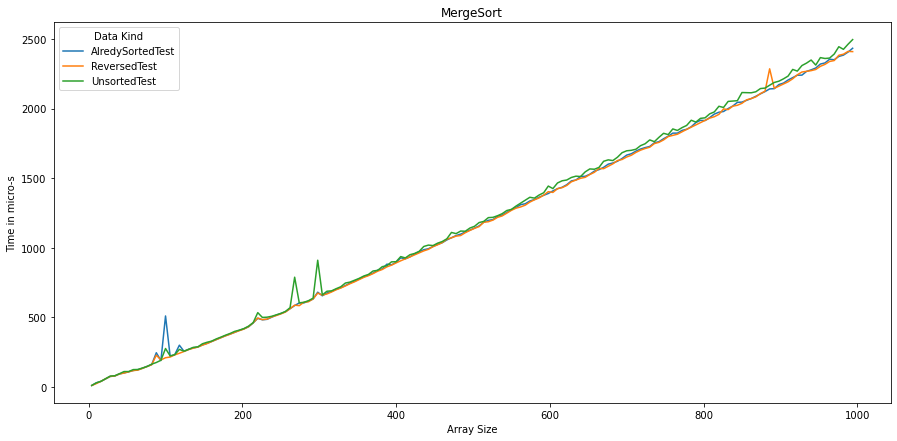

In [45]:
dfMS = frames[0].pivot(index='Size', columns='Data Kind', values='TimeElapsed')
dfMS.plot(xlabel='Array Size', ylabel='Time in micro-s', title='MergeSort', figsize=(15,7))

<AxesSubplot:title={'center':'InsertionSort'}, xlabel='Array Size', ylabel='Time in micro-s'>

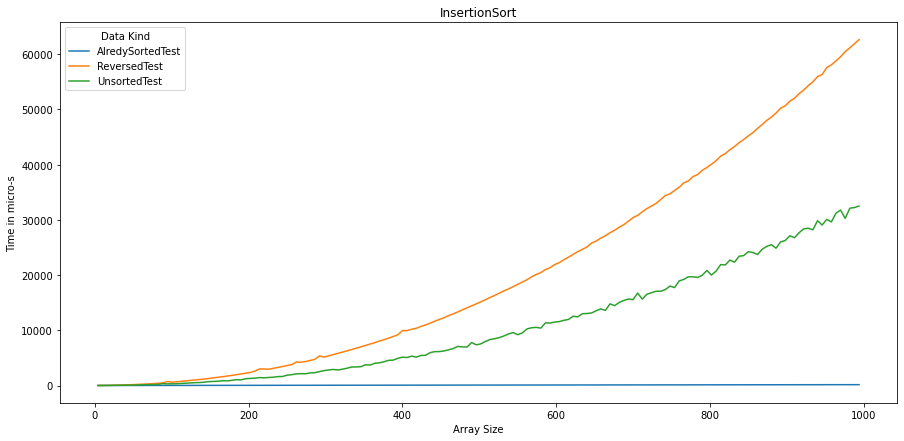

In [46]:
dfIS = frames[1].pivot(index='Size', columns='Data Kind', values='TimeElapsed')
dfIS.plot(xlabel='Array Size', ylabel='Time in micro-s', title='InsertionSort', figsize=(15,7))

In [14]:
#dfUns = frames[0].pivot(index='Size', columns='Data Kind', values='TimeElapsed')
#dfSor = frames[1].pivot(index='Size', columns='Sorting Method', values='TimeElapsed')
#dfRSor = frames[2].pivot(index='Size', columns='Sorting Method', values='TimeElapsed')
#dfUns.plot(xlabel='Array Size', ylabel='Time in ns', title='Unsorted', figsize=(15,7))
#dfSor.plot(xlabel='Array Size', ylabel='Time in ns', title='AlreadySorted', figsize=(15,7))
#dfRSor.plot(xlabel='Array Size', ylabel='Time in ns', title='Reversed', figsize=(15,7))